In [2]:
import cv2
from PIL import Image
from pathlib import Path
import torch
from config import get_config
# from utils import load_facebank, draw_box_name, prepare_facebank
from arcface_infer import Arcface

In [3]:
conf = get_config(training = False)
arcface = Arcface(conf)

{'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'data_mode': 'emore', 'model_path': './model_ir_se50.pth', 'work_path': PosixPath('work_space'), 'input_size': [112, 112], 'emore_folder': PosixPath('data/faces_emore'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'device': device(type='cuda', index=0), 'threshold': 1.5, 'test_transform': Compose(
    Resize(size=[112, 112], interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'net_mode': 'ir_se', 'net_depth': 50, 'min_face_size': 30, 'face_limit': 10, 'facebank_path': PosixPath('data/facebank'), 'batch_size': 100, 'use_mobilfacenet': False, 'embedding_size': 512, 'data_path': PosixPath('data'), 'drop_ratio': 0.6}
ir_se_50 model generated


In [4]:
evan_path = '/home/levan/Pictures/evan_query.png'
# e1 = cv2.imread(evan_path)
# e1 = Image.fromarray(e1)
e1 = Image.open(evan_path)
e2 = Image.open('/home/levan/Pictures/evan_query2.png')
jy = Image.open('/home/levan/Pictures/junyu.png')
niche = Image.open('/home/levan/Pictures/niche_query.png')

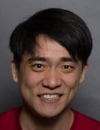

In [6]:
jy

In [7]:
res = arcface.embed(conf, [e1, e2, jy, niche] , tta=True)

In [8]:
len(res)

4

In [9]:
import numpy as np

In [10]:
np.linalg.norm(res[0] - res[1])

1.1344151

In [11]:
from scipy.spatial import distance_matrix
dist_mat = distance_matrix(res, res)

In [12]:
dist_mat.shape

(4, 4)

In [13]:
dist_mat

array([[0.       , 1.1344151, 1.312006 , 1.137522 ],
       [1.1344151, 0.       , 1.221928 , 1.2629033],
       [1.312006 , 1.221928 , 0.       , 1.3873122],
       [1.137522 , 1.2629033, 1.3873122, 0.       ]], dtype=float32)